## [CMPE255] Group Project: Cropland Classification

####  Group3 
Baijun Jian (013723034), Karen Lee (014521052), Kavyashree Chandrashekar (013856518)
#### Dataset
UCI Crop mapping using fused optical-radar dataset:
https://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set

In [2]:
#!/usr/local/cuda/bin/nvcc --version
#!nvidia-smi

In [3]:
#import tensorflow as tf 
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Load Dataset

In [ ]:
# Download it using wget (Linux) or manually download it and place on the same folder as this notebook
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00525/data.zip

--2020-11-28 16:39:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00525/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158060686 (151M) [application/x-httpd-php]
Saving to: ‘data.zip’

data.zip            100%[===================>] 150.74M  19.8MB/s    in 8.7s    

2020-11-28 16:39:41 (17.3 MB/s) - ‘data.zip’ saved [158060686/158060686]



In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: WinnipegDataset.txt     


In [6]:
df = pd.read_csv('../WinnipegDataset.txt', sep=',')
df.shape

(325834, 175)

### Data Exploration

In [7]:
df.head(5)

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325834 entries, 0 to 325833
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 435.0 MB


In [9]:
df.describe()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
count,325834.000000,325834.000000,325834.000000,325834.000000,325834.00000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,...,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000
mean,4.062421,-15.143602,-24.026035,-15.400034,-18.59383,-14.493472,-18.427329,0.256432,-8.882434,-8.626002,...,0.433834,0.329085,2.171177,0.080138,0.919604,0.174447,0.162900,0.403288,0.764646,0.667567
std,1.604617,3.504255,4.054214,3.267857,3.71163,3.189013,3.675741,1.682060,1.204040,2.002658,...,0.245857,0.442008,1.284653,0.182628,0.105953,0.373726,0.222008,0.480141,0.273847,0.471260
min,1.000000,-23.971000,-34.308000,-23.161000,-27.24500,-22.103000,-26.897000,-5.582600,-16.389000,-16.558000,...,0.111110,-1.000000,0.000000,0.000000,0.106190,0.000000,0.000000,-0.000000,0.111110,-1.000000
25%,3.000000,-17.848000,-27.119000,-17.563000,-21.44900,-16.989000,-21.450000,-1.037800,-9.658500,-10.070000,...,0.259260,0.000000,1.000000,0.000000,0.833330,0.000000,0.000000,-0.000000,0.506170,0.357140
50%,4.000000,-15.992000,-25.064000,-16.164000,-19.58800,-15.099000,-19.282000,0.309180,-8.915900,-8.733100,...,0.358020,0.357140,2.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,1.000000,1.000000
75%,6.000000,-11.786000,-20.387000,-13.427000,-15.65000,-11.735000,-15.514000,1.558200,-8.190200,-7.158100,...,0.506170,0.661440,3.000000,0.172840,1.000000,0.333330,0.333330,0.848690,1.000000,1.000000
max,7.000000,2.535600,-7.589100,1.104000,0.77491,-0.887390,0.951780,7.029900,-1.175400,-0.924610,...,1.000000,1.000000,12.444000,25.951000,1.000000,66.667000,6.666700,2.197200,1.000000,1.000000


In [10]:
df.isnull().sum(axis=0)

label    0
f1       0
f2       0
f3       0
f4       0
        ..
f170     0
f171     0
f172     0
f173     0
f174     0
Length: 175, dtype: int64

In [11]:
df['label'].unique()

array([1, 2, 3, 4, 5, 6, 7])

Class=1, n=39162 (12.019%)
Class=2, n=3598 (1.104%)
Class=3, n=75673 (23.224%)
Class=4, n=74067 (22.732%)
Class=5, n=47117 (14.460%)
Class=6, n=85074 (26.110%)
Class=7, n=1143 (0.351%)


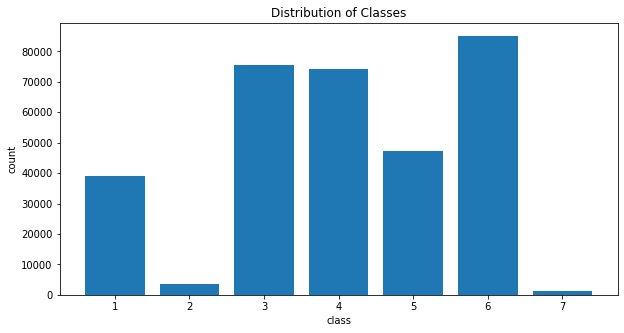

In [12]:
from collections import Counter

counter = Counter(sorted(df['label']))

for k,v in counter.items():
    per = v/len(df['label'])*100
    print('Class=%d, n=%d (%.3f%%)'%(k, v, per))

#plot class distribution
plt.figure(figsize=(10, 5))
plt.title('Distribution of Classes')
plt.bar(counter.keys(), counter.values())
plt.xlabel('class')
plt.ylabel('count')
plt.show()

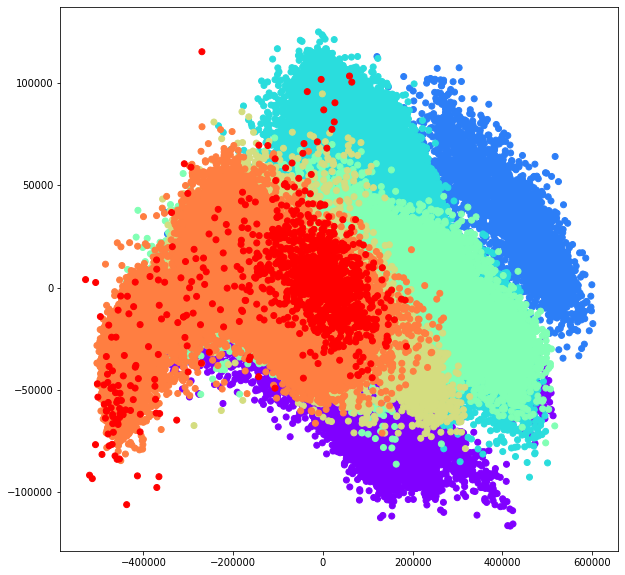

In [13]:
features = df.iloc[:,1:]
labels = df['label']

from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
features = pca.fit_transform(features)

plt.figure(figsize = (10, 10))
plt.scatter(features[:,0], features[:,1], c=labels, cmap='rainbow')
plt.show()

### Selecting Features

Embedded methods using Lasso regularisation, SelectFromModel

In [14]:
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [15]:
df_copy = df.copy()

features = df_copy.iloc[:,1:]
labels = df_copy['label']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

#### LogisticRegression L2 

In [17]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(features), labels)

SelectFromModel(estimator=LogisticRegression(C=1))

In [18]:
selected_feat = features.columns[(sel_.get_support())]
print('total features: {}'.format((features.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
selected_feat

total features: 174
selected features: 67


Index(['f8', 'f9', 'f10', 'f14', 'f16', 'f18', 'f23', 'f26', 'f27', 'f31',
       'f33', 'f34', 'f35', 'f40', 'f42', 'f45', 'f46', 'f49', 'f56', 'f57',
       'f58', 'f59', 'f63', 'f65', 'f67', 'f68', 'f74', 'f75', 'f76', 'f83',
       'f89', 'f94', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102',
       'f103', 'f112', 'f114', 'f115', 'f116', 'f121', 'f129', 'f137', 'f138',
       'f139', 'f140', 'f141', 'f143', 'f144', 'f146', 'f148', 'f149', 'f150',
       'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159',
       'f167'],
      dtype='object')

In [19]:
np.sum(sel_.estimator_.coef_ == 0)

0

In [20]:
X_lasso = sel_.transform(scaler.transform(features))
y_lasso = labels

X_lasso.shape, y_lasso.shape

((325834, 67), (325834,))

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.3, random_state=42)

#### Lasso Cross Validation(L1)

In [22]:
sel_cv = SelectFromModel(LassoCV())
sel_cv.fit(scaler.transform(features), labels)
selected_fe = features.columns[(sel_cv.get_support())]
print('total features: {}'.format((features.shape[1])))
print('selected features: {}'.format(len(selected_fe)))
print('features with zero: {}'.format(np.sum(sel_cv.estimator_.coef_ == 0)))

kept_features = features.columns[(sel_cv.estimator_.coef_ > 0).ravel().tolist()]
len(kept_features)

total features: 174
selected features: 45
features with zero: 129


20

In [23]:
selected_fe

Index(['f7', 'f10', 'f14', 'f19', 'f20', 'f21', 'f22', 'f34', 'f40', 'f41',
       'f42', 'f46', 'f48', 'f58', 'f59', 'f65', 'f71', 'f72', 'f73', 'f75',
       'f76', 'f84', 'f89', 'f96', 'f97', 'f98', 'f99', 'f101', 'f110', 'f114',
       'f115', 'f118', 'f119', 'f123', 'f130', 'f137', 'f138', 'f144', 'f150',
       'f152', 'f155', 'f161', 'f163', 'f168', 'f170'],
      dtype='object')

In [24]:
X_lasso_cv = sel_cv.transform(scaler.transform(features))
y_lasso_cv = labels
X_lasso_cv.shape, y_lasso_cv.shape

((325834, 45), (325834,))

### Divide dataset into train and test dataset

In [25]:
X = X_lasso
y = y_lasso

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_lasso_cv, y_lasso_cv, test_size=0.3, random_state=42)


print('Train shape L2: ', X_train.shape)
print('Test shape L2: ', X_test.shape)
print('Train shape L1:', X_train_cv.shape)
print('Train shape L1:', X_test_cv.shape)

Train shape L2:  (228083, 67)
Test shape L2:  (97751, 67)
Train shape L1: (228083, 45)
Train shape L1: (97751, 45)


### Model Creation and Prediction

In [27]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
mlp = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)
pred_accuracy_score = accuracy_score(y_test,pred)
pred_f1_score = f1_score(y_test, pred, average='macro')
pred_rmse = np.math.sqrt(mean_squared_error(y_test, pred))
print((pred_accuracy_score, pred_f1_score, pred_rmse))
print(classification_report(y_test, pred))

(0.9831817577313787, 0.9478383304402824, 0.289543536422056)
              precision    recall  f1-score   support

           1       0.98      0.98      0.98     11777
           2       0.97      0.95      0.96      1095
           3       0.99      0.99      0.99     22738
           4       0.99      0.99      0.99     22229
           5       0.97      0.97      0.97     14054
           6       0.98      0.98      0.98     25526
           7       0.70      0.83      0.76       332

    accuracy                           0.98     97751
   macro avg       0.94      0.96      0.95     97751
weighted avg       0.98      0.98      0.98     97751



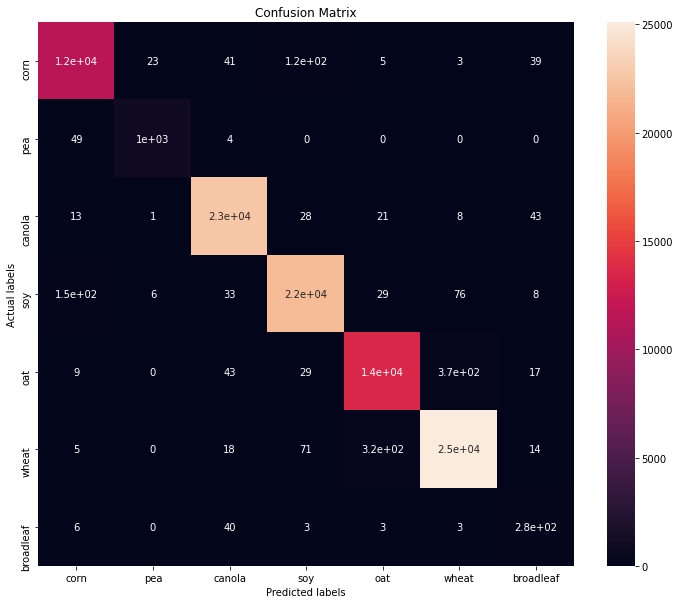

In [28]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['corn', 'pea', 'canola', 'soy', 'oat', 'wheat', 'broadleaf']) 
ax.yaxis.set_ticklabels(['corn', 'pea', 'canola', 'soy', 'oat', 'wheat', 'broadleaf'])
plt.show()

In [30]:
mlp_l1 = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp_l1.fit(X_train_cv, y_train_cv)
mlp_l1_pred = mlp_l1.predict(X_test_cv)
pred_l1_accuracy_score = accuracy_score(y_test_cv,mlp_l1_pred)
pred_l1_f1_score = f1_score(y_test_cv, pred, average='macro')
pred_l1_rmse = np.math.sqrt(mean_squared_error(y_test_cv, mlp_l1_pred))
print((pred_l1_accuracy_score, pred_l1_f1_score, pred_l1_rmse))
print(classification_report(y_test_cv, mlp_l1_pred))

(0.9587421100551401, 0.9478383304402824, 0.47945802864026477)
              precision    recall  f1-score   support

           1       0.87      0.98      0.92     11777
           2       0.00      0.00      0.00      1095
           3       0.99      0.99      0.99     22738
           4       0.98      0.98      0.98     22229
           5       0.94      0.92      0.93     14054
           6       0.96      0.97      0.97     25526
           7       0.00      0.00      0.00       332

    accuracy                           0.96     97751
   macro avg       0.68      0.69      0.69     97751
weighted avg       0.95      0.96      0.95     97751



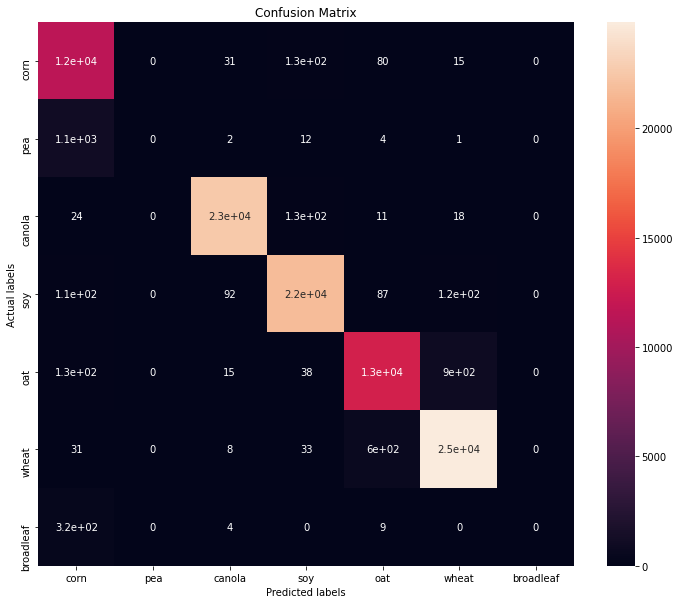

In [31]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test_cv, mlp_l1_pred)
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['corn', 'pea', 'canola', 'soy', 'oat', 'wheat', 'broadleaf']) 
ax.yaxis.set_ticklabels(['corn', 'pea', 'canola', 'soy', 'oat', 'wheat', 'broadleaf'])
plt.show()